In [155]:
import pandas as pd
import sklearn.linear_model as lm
from matplotlib import pyplot as plt
import seaborn as sns
import pylab as pl
%matplotlib inline
import numpy as np
plt.style.use('ggplot')
import statsmodels.api as sm


dp=pd.read_csv('../../draftposition.csv') 
stats=pd.read_csv('../../NBA Player Stats By Year 2.csv')
ws=pd.read_csv('../../winshares.csv')
mvp=pd.read_csv('../../winshares.csv')

In [156]:
#At first I thought about doing my analysis around the NBA draft so I brought in historical draft data to better understand how draft position effects your value to a team
dp.head()

,Pick,Player,Yrs,Draft
0,1,Mychal Thompson,12.0,1978
1,2,Phil Ford,7.0,1978
2,3,Rick Robey,8.0,1978
3,4,Micheal Ray Richardson,8.0,1978
4,5,Purvis Short,12.0,1978


In [157]:
#I needed to create a field with just player name to properly create a join
whiteSpaceRegex = "\\\s";
player_split = dp.Player.str.split(whiteSpaceRegex, expand=True);
print player_split.head()

                        0
0         Mychal Thompson
1               Phil Ford
2              Rick Robey
3  Micheal Ray Richardson
4            Purvis Short


In [158]:
#I split out the player field into two fields for a later join
stats_new=stats.join(stats['Player'].str.split('\\', 1, expand=True).rename(columns={0:'Player_name', 1:'Player_id'})) 
print stats_new.head()

   Year                   Player Pos  Age   Tm   G    MP    FG%    3P%    2P%  \
0  2015       Quincy Acy\acyqu01  PF   25  SAC  59   876  0.556  0.388  0.606   
1  2015   Jordan Adams\adamsjo01  SG   21  MEM   2    15  0.333  0.000  0.400   
2  2015   Steven Adams\adamsst01   C   22  OKC  80  2014  0.613    NaN  0.613   
3  2015  Arron Afflalo\afflaar01  SG   30  NYK  71  2371  0.443  0.382  0.469   
4  2015  Alexis Ajinca\ajincal01   C   27  NOP  59   861  0.476  0.000  0.478   

    eFG%    FT%  TRB  AST  STL  BLK  PTS    Player_name  Player_id  
0  0.600  0.735  188   27   29   24  307     Quincy Acy    acyqu01  
1  0.333  0.600    2    3    3    0    7   Jordan Adams  adamsjo01  
2  0.613  0.582  533   62   42   89  636   Steven Adams  adamsst01  
3  0.500  0.840  266  144   25   10  909  Arron Afflalo  afflaar01  
4  0.476  0.839  269   31   19   36  352  Alexis Ajinca  ajincal01  


In [159]:
stats_new.head() 

,Year,Player,Pos,Age,Tm,G,MP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Player_name,Player_id
0,2015,Quincy Acy\acyqu01,PF,25,SAC,59,876,0.556,0.388,0.606,0.600,0.735,188,27,29,24,307,Quincy Acy,acyqu01
1,2015,Jordan Adams\adamsjo01,SG,21,MEM,2,15,0.333,0.000,0.400,0.333,0.600,2,3,3,0,7,Jordan Adams,adamsjo01
2,2015,Steven Adams\adamsst01,C,22,OKC,80,2014,0.613,NaN,0.613,0.613,0.582,533,62,42,89,636,Steven Adams,adamsst01
3,2015,Arron Afflalo\afflaar01,SG,30,NYK,71,2371,0.443,0.382,0.469,0.500,0.840,266,144,25,10,909,Arron Afflalo,afflaar01
4,2015,Alexis Ajinca\ajincal01,C,27,NOP,59,861,0.476,0.000,0.478,0.476,0.839,269,31,19,36,352,Alexis Ajinca,ajincal01


In [160]:
len(stats.Player.value_counts())

2823

In [161]:
#the win shares table to show the win shares by player by season 
#notice that there is not player identifier here, which is why i had to split out the name of the player from their identifier above
ws.head()

,Season,Player,WS
0,1979,Aaron James,1.7
1,1979,Adrian Dantley*,5.7
2,1979,Al Skinner,1.2
3,1979,Alex English*,7.0
4,1979,Allan Bristow,3.5


In [162]:
stats_new.head()

,Year,Player,Pos,Age,Tm,G,MP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Player_name,Player_id
0,2015,Quincy Acy\acyqu01,PF,25,SAC,59,876,0.556,0.388,0.606,0.600,0.735,188,27,29,24,307,Quincy Acy,acyqu01
1,2015,Jordan Adams\adamsjo01,SG,21,MEM,2,15,0.333,0.000,0.400,0.333,0.600,2,3,3,0,7,Jordan Adams,adamsjo01
2,2015,Steven Adams\adamsst01,C,22,OKC,80,2014,0.613,NaN,0.613,0.613,0.582,533,62,42,89,636,Steven Adams,adamsst01
3,2015,Arron Afflalo\afflaar01,SG,30,NYK,71,2371,0.443,0.382,0.469,0.500,0.840,266,144,25,10,909,Arron Afflalo,afflaar01
4,2015,Alexis Ajinca\ajincal01,C,27,NOP,59,861,0.476,0.000,0.478,0.476,0.839,269,31,19,36,352,Alexis Ajinca,ajincal01


In [163]:
#renamed the columns to make it easier to join
stats_new1=stats_new.rename(columns= {'Year':'Season', 'Player':'Player_identifier'})

stats_new1.head()

,Season,Player_identifier,Pos,Age,Tm,G,MP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Player_name,Player_id
0,2015,Quincy Acy\acyqu01,PF,25,SAC,59,876,0.556,0.388,0.606,0.600,0.735,188,27,29,24,307,Quincy Acy,acyqu01
1,2015,Jordan Adams\adamsjo01,SG,21,MEM,2,15,0.333,0.000,0.400,0.333,0.600,2,3,3,0,7,Jordan Adams,adamsjo01
2,2015,Steven Adams\adamsst01,C,22,OKC,80,2014,0.613,NaN,0.613,0.613,0.582,533,62,42,89,636,Steven Adams,adamsst01
3,2015,Arron Afflalo\afflaar01,SG,30,NYK,71,2371,0.443,0.382,0.469,0.500,0.840,266,144,25,10,909,Arron Afflalo,afflaar01
4,2015,Alexis Ajinca\ajincal01,C,27,NOP,59,861,0.476,0.000,0.478,0.476,0.839,269,31,19,36,352,Alexis Ajinca,ajincal01


In [164]:
stats_final=stats_new1.rename(columns= {'Player_name':'Player'})

In [165]:
stats_final.head()

,Season,Player_identifier,Pos,Age,Tm,G,MP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Player,Player_id
0,2015,Quincy Acy\acyqu01,PF,25,SAC,59,876,0.556,0.388,0.606,0.600,0.735,188,27,29,24,307,Quincy Acy,acyqu01
1,2015,Jordan Adams\adamsjo01,SG,21,MEM,2,15,0.333,0.000,0.400,0.333,0.600,2,3,3,0,7,Jordan Adams,adamsjo01
2,2015,Steven Adams\adamsst01,C,22,OKC,80,2014,0.613,NaN,0.613,0.613,0.582,533,62,42,89,636,Steven Adams,adamsst01
3,2015,Arron Afflalo\afflaar01,SG,30,NYK,71,2371,0.443,0.382,0.469,0.500,0.840,266,144,25,10,909,Arron Afflalo,afflaar01
4,2015,Alexis Ajinca\ajincal01,C,27,NOP,59,861,0.476,0.000,0.478,0.476,0.839,269,31,19,36,352,Alexis Ajinca,ajincal01


In [166]:
#combine the stats with the win shares by player and by season
wstats=pd.merge(stats_final,ws, how='left',on=('Player', 'Season'))

In [167]:
wstats.head()

,Season,Player_identifier,Pos,Age,Tm,G,MP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,Player,Player_id,WS
0,2015,Quincy Acy\acyqu01,PF,25,SAC,59,876,0.556,0.388,0.606,0.600,0.735,188,27,29,24,307,Quincy Acy,acyqu01,1.7
1,2015,Jordan Adams\adamsjo01,SG,21,MEM,2,15,0.333,0.000,0.400,0.333,0.600,2,3,3,0,7,Jordan Adams,adamsjo01,0.4
2,2015,Steven Adams\adamsst01,C,22,OKC,80,2014,0.613,NaN,0.613,0.613,0.582,533,62,42,89,636,Steven Adams,adamsst01,4.1
3,2015,Arron Afflalo\afflaar01,SG,30,NYK,71,2371,0.443,0.382,0.469,0.500,0.840,266,144,25,10,909,Arron Afflalo,afflaar01,2.6
4,2015,Alexis Ajinca\ajincal01,C,27,NOP,59,861,0.476,0.000,0.478,0.476,0.839,269,31,19,36,352,Alexis Ajinca,ajincal01,3.2


In [168]:
time_line_df = pd.DataFrame(wstats.Player)    

In [169]:
years = wstats['Season'].unique()

In [170]:
wstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18676 entries, 0 to 18675
Data columns (total 20 columns):
Season               18676 non-null int64
Player_identifier    18676 non-null object
Pos                  18676 non-null object
Age                  18676 non-null int64
Tm                   18676 non-null object
G                    18676 non-null int64
MP                   18676 non-null int64
FG%                  18588 non-null float64
3P%                  14867 non-null float64
2P%                  18562 non-null float64
eFG%                 18588 non-null float64
FT%                  17945 non-null float64
TRB                  18676 non-null int64
AST                  18676 non-null int64
STL                  18676 non-null int64
BLK                  18676 non-null int64
PTS                  18676 non-null int64
Player               18676 non-null object
Player_id            18676 non-null object
WS                   14737 non-null float64
dtypes: float64(6), int64(9), obje

In [171]:
#drop any null values for a clean data set
wstats.dropna(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1f5efaf10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1f6280790>]], dtype=object)

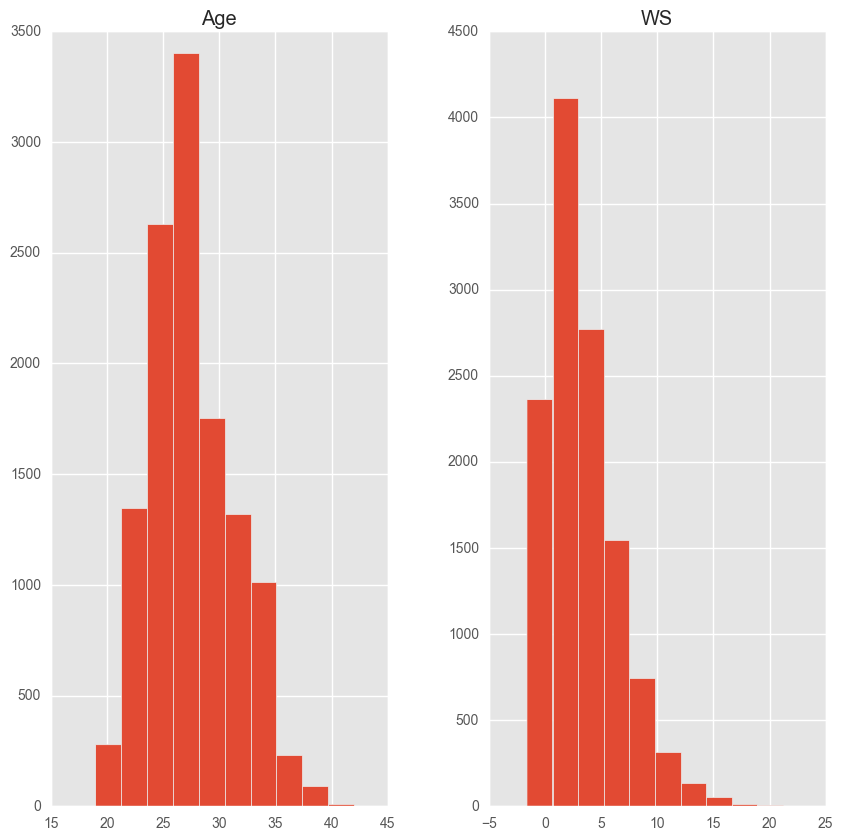

In [218]:
#Now I can start to look at my distributions and what metrics look interesting to me in this data set  
#### I wanted to look at age and duration but I need to qualify that those metrics are worth looking into
# visualize the distribution of each of these variables.
columns_to_keep = ["Age", "WS"]
sub_data = wstats[columns_to_keep]
fig, ax = plt.subplots(figsize=(10,10))
sub_data.hist(ax=ax)

In [173]:
#The highest concentration of players are around 25 years old and contribute between 2-5 win shares per season

In [174]:
wstats.describe()

,Season,Age,G,MP,FG%,3P%,2P%,eFG%,FT%,TRB,AST,STL,BLK,PTS,WS
count,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000,12073.000000
mean,1999.082912,27.499462,57.162180,1441.891908,0.444082,0.253607,0.465249,0.475193,0.746626,241.593804,145.749689,49.300505,26.940777,618.632237,3.404092
std,10.436918,3.774679,23.097914,895.351915,0.062366,0.172790,0.064691,0.060872,0.120073,204.975325,148.910348,39.087301,36.997614,494.467038,3.117889
min,1979.000000,19.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.600000
25%,1991.000000,25.000000,40.000000,662.000000,0.410000,0.125000,0.434000,0.446000,0.692000,85.000000,41.000000,19.000000,5.000000,214.000000,1.000000
50%,2000.000000,27.000000,65.000000,1397.000000,0.446000,0.300000,0.470000,0.480000,0.765000,189.000000,98.000000,41.000000,14.000000,503.000000,2.700000
75%,2008.000000,30.000000,78.000000,2182.000000,0.482000,0.365000,0.501000,0.511000,0.822000,338.000000,200.000000,70.000000,33.000000,915.000000,5.100000
max,2015.000000,42.000000,85.000000,3533.000000,0.800000,1.000000,1.000000,0.900000,1.000000,1530.000000,1164.000000,301.000000,376.000000,3041.000000,21.200000


In [175]:
#I created a group by to see my major stats by age and see how the average player in the NBA at that age performs 
ws1=wstats.groupby([wstats['Age']]).mean() 

print ws1

          Season          G           MP       FG%       3P%       2P%  \
Age                                                                      
19   2002.454545  40.818182   719.545455  0.419000  0.217364  0.436636   
20   2006.352113  60.042254  1511.098592  0.445535  0.263507  0.466183   
21   2005.943878  61.913265  1648.811224  0.442898  0.237827  0.468173   
22   2005.043373  57.532530  1511.306024  0.445590  0.254229  0.472484   
23   1999.439914  57.167382  1416.615880  0.446650  0.242733  0.468200   
24   1997.821429  56.386161  1363.685268  0.445754  0.239900  0.465909   
25   1997.729183  58.127626  1458.350973  0.449043  0.244369  0.469695   
26   1997.687599  57.187599  1483.601749  0.446778  0.245301  0.467490   
27   1997.840645  58.468218  1539.131603  0.449062  0.248481  0.469475   
28   1998.903790  58.656948  1542.781341  0.448486  0.258257  0.471398   
29   1998.476554  58.885496  1546.521265  0.447558  0.268336  0.468310   
30   1998.725749  57.232335  1454.8718

This looks like on average players are the most "valuable" at 29 where they have the highest mean win shares

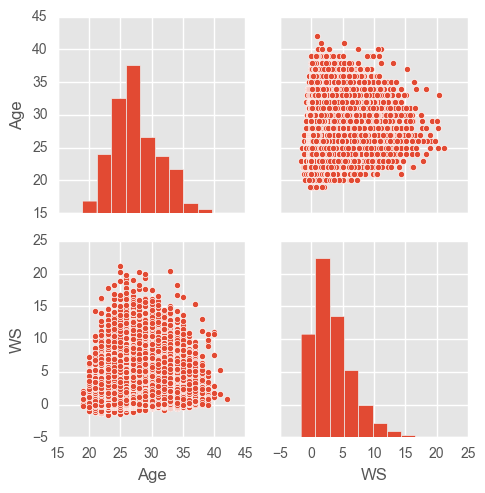

In [177]:
#Shows me the distribution of data
cols = ['Age', 'WS']
sns.pairplot(wstats[cols], size=2.5);

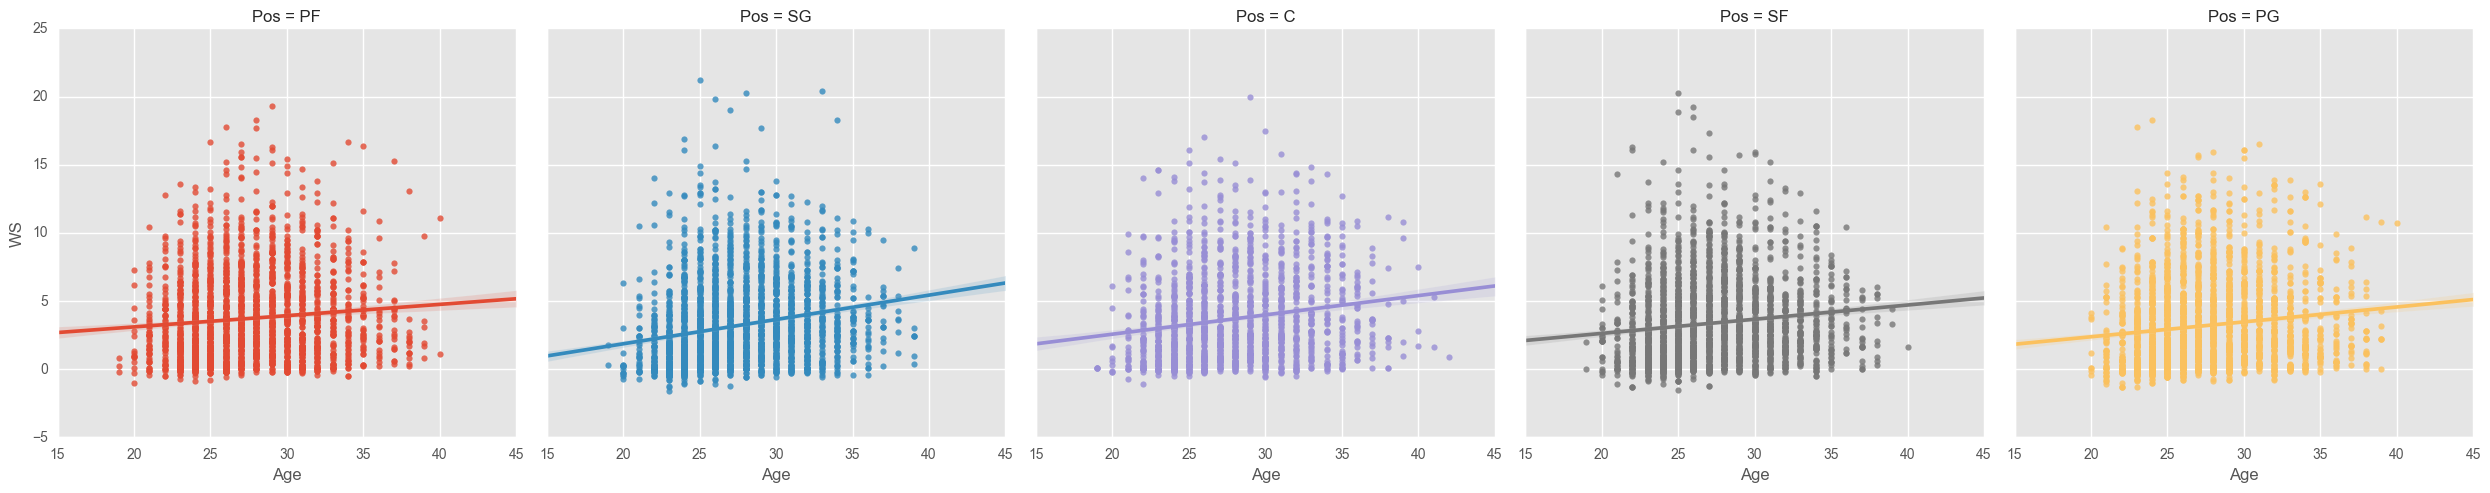

In [178]:
sns.lmplot(data=wstats,
           x='Age', y='WS',
          col='Pos', hue='Pos');

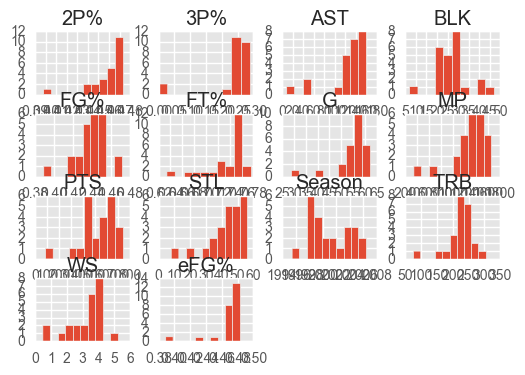

In [179]:
#Does a bad job of shoing the distributions of all the metrics 
ws1.hist()
pl.show()

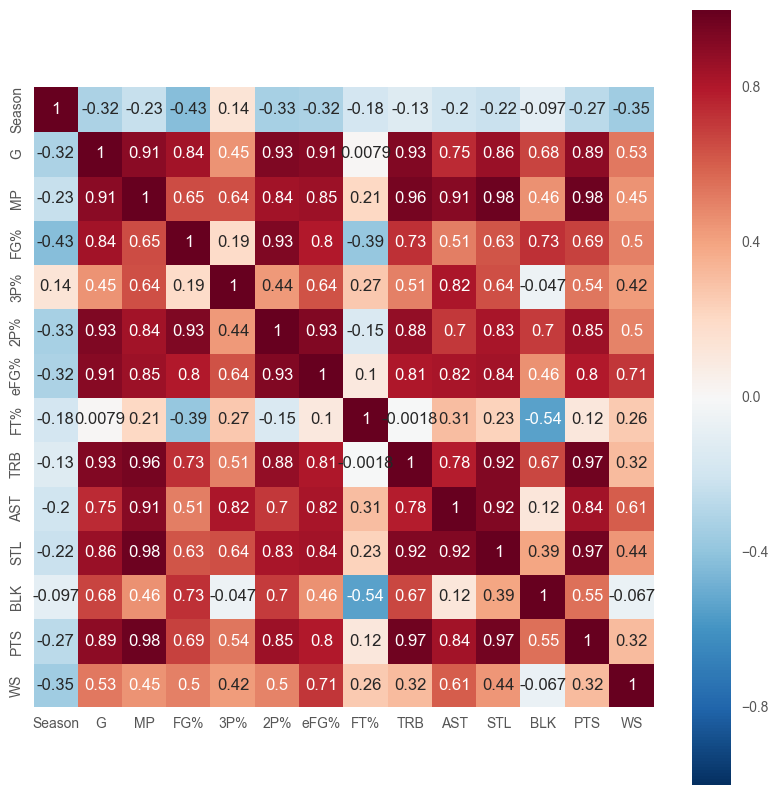

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(ws1.corr(), square=True, annot=True, annot_kws={'size': 12})

-Steals is highly correlated with points, assists, and rebounds 
-Win shares are most highly correlated to effective fg% (efg%) with assists right behind it 

In [32]:
ws_age = wstats.groupby(['Age']).size().sort_values(ascending=False)
print ws_age

Age
24    1344
25    1285
26    1258
27    1117
28    1029
23     932
29     917
30     835
31     720
32     598
33     443
22     415
34     341
35     228
21     196
36     134
37      99
20      71
38      63
39      27
19      11
40       7
41       2
42       1
dtype: int64


-This says that the NBA is compromised of people mostly ages 24-28 
-There are fewer players who are 29 that are still in the league, which leads me to believe that by the time you are 29 that only the best players are left 

In [ ]:
#plot = sns.factorplot(x='Age', 
#                      y='WS',
#                      kind='bar',
#                      data = wstats,
#                     size = 50,
#                      estimator=len, 
#                      order=ws_age.index.tolist()
 #                     )
#plot.set_xticklabels(rotation=45, horizontalalignment='right');

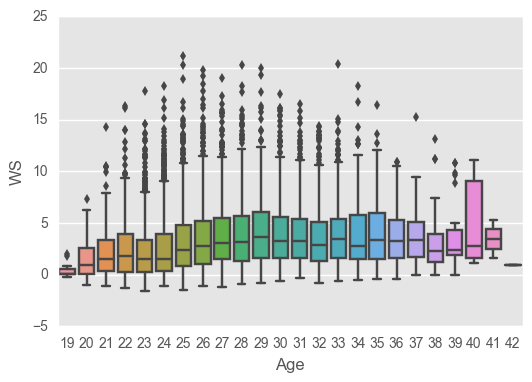

In [33]:
sns.boxplot(x="Age", y="WS", data=wstats);

-Looking at this Box Plot you can see there are clearly some outliers after the age of 38 and a couple of big outliers after a player was 40. These are most likely Kareem Abdoul-Jabaar, who famously played at a very high level until the age of 42

In [ ]:

#logit = sm.Logit(wstats['WS'], wstats[Player])

# fit the model
#result = logit.fit()

I thought about creating a model based on only 2014 data but I ended up abandoning that strategy because I felt that the data set was not big enough and I was not getting the results I wanted

In [180]:
#season2014 = wstats[wstats.Season == 2014] 
#print season2014.head()

In [181]:
#season2014.info()

In [182]:
#s2014=season2014.groupby([season2014['Age']]).mean() 

#print s2014

In [183]:
#s2014.describe()

In [184]:
#y = s2014.WS
#X = sm.add_constant(s2014.drop(['WS'], axis=1))
#model = sm.OLS(endog=y, exog=X)
#result1 = model.fit()
#result1.summary()

In [185]:
#from scipy.stats import norm, normaltest, describe
#sns.distplot(result1.resid, fit=norm, rug=True);
#print describe(result1.resid)
#stat, p = normaltest(result1.resid)
#p

In [216]:
## Adding features to X

# A few variables contain strings that we can convert to numbers
#season2014.dtypes.sort_values()

#dtypes = season2014.dtypes
#is_object = dtypes[dtypes=='object'].index.tolist()
#is_object

In [211]:
# Some variables are not going to be useful without further work:
#to_drop = ['Tm', 'Player', 'Player_id']

In [222]:
print wstats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12073 entries, 0 to 18330
Data columns (total 20 columns):
Season               12073 non-null int64
Player_identifier    12073 non-null object
Pos                  12073 non-null object
Age                  12073 non-null int64
Tm                   12073 non-null object
G                    12073 non-null int64
MP                   12073 non-null int64
FG%                  12073 non-null float64
3P%                  12073 non-null float64
2P%                  12073 non-null float64
eFG%                 12073 non-null float64
FT%                  12073 non-null float64
TRB                  12073 non-null int64
AST                  12073 non-null int64
STL                  12073 non-null int64
BLK                  12073 non-null int64
PTS                  12073 non-null int64
Player               12073 non-null object
Player_id            12073 non-null object
WS                   12073 non-null float64
dtypes: float64(6), int64(9), obje

In [213]:
player_stats = wstats.groupby(['Player_identifier']).mean() 

del player_stats ['Season'] 

del player_stats ['Age']

print player_stats.head() 

                                G           MP       FG%       3P%       2P%  \
Player_identifier                                                              
A.C. Green\greenac01    75.235294  2206.000000  0.484647  0.145647  0.499353   
A.J. English\engliaj01  81.000000  1665.000000  0.433000  0.176000  0.443000   
A.J. Guyton\guytoaj01   45.000000   607.000000  0.361000  0.374000  0.347000   
A.J. Price\priceaj01    32.285714   477.714286  0.367571  0.263000  0.443000   
Aaron Brooks\brookaa01  57.500000  1359.200000  0.401100  0.357500  0.428000   

                            eFG%       FT%         TRB         AST        STL  \
Player_identifier                                                               
A.C. Green\greenac01    0.490412  0.713765  573.411765   83.235294  62.000000   
A.J. English\engliaj01  0.436000  0.841000  168.000000  143.000000  32.000000   
A.J. Guyton\guytoaj01   0.455000  0.815000   44.000000   81.000000  10.000000   
A.J. Price\priceaj01    0.428714  

In [80]:
player_career=wstats.groupby('Player_identifier').Season.agg([np.min, np.max])

player_career["Duration"] = player_career['amax'] - player_career['amin']

print player_career.head()

                        amin  amax  Duration
Player_identifier                           
A.C. Green\greenac01    1986  2000        14
A.J. English\engliaj01  1991  1991         0
A.J. Guyton\guytoaj01   2001  2001         0
A.J. Price\priceaj01    2010  2014         4
Aaron Brooks\brookaa01  2008  2015         7


In [113]:
#print player_career.info()

In [112]:
#print player_stats.info()

In [134]:
player_stats2=pd.merge(player_stats, player_career, right_index=True, left_index=True)
print player_stats2.head() 

                                G           MP       FG%       3P%       2P%  \
Player_identifier                                                              
A.C. Green\greenac01    75.235294  2206.000000  0.484647  0.145647  0.499353   
A.J. English\engliaj01  81.000000  1665.000000  0.433000  0.176000  0.443000   
A.J. Guyton\guytoaj01   45.000000   607.000000  0.361000  0.374000  0.347000   
A.J. Price\priceaj01    32.285714   477.714286  0.367571  0.263000  0.443000   
Aaron Brooks\brookaa01  57.500000  1359.200000  0.401100  0.357500  0.428000   

                            eFG%       FT%         TRB         AST        STL  \
Player_identifier                                                               
A.C. Green\greenac01    0.490412  0.713765  573.411765   83.235294  62.000000   
A.J. English\engliaj01  0.436000  0.841000  168.000000  143.000000  32.000000   
A.J. Guyton\guytoaj01   0.455000  0.815000   44.000000   81.000000  10.000000   
A.J. Price\priceaj01    0.428714  

In [147]:
#player_stats2.info()

In [251]:
player_stats3 = player_stats2[player_stats2.Duration > 2] 


In [193]:
group_stats3 = player_stats3.groupby([player_stats3['Duration']]).mean() 
print group_stats3

                  G           MP       FG%       3P%       2P%      eFG%  \
Duration                                                                   
3         53.530424  1141.190503  0.448373  0.223057  0.468062  0.471412   
4         52.655568  1164.986108  0.442404  0.234516  0.460982  0.468421   
5         56.415810  1246.441966  0.443538  0.225103  0.462997  0.468706   
6         58.316425  1356.223360  0.452318  0.220041  0.472201  0.476946   
7         59.189757  1447.833839  0.451584  0.235817  0.467906  0.474985   
8         59.766135  1482.759543  0.442809  0.247024  0.461587  0.474803   
9         60.216187  1540.059070  0.447163  0.256006  0.467648  0.481566   
10        61.084044  1606.790582  0.450811  0.246475  0.471399  0.482979   
11        62.015827  1733.228764  0.445035  0.268758  0.464818  0.478635   
12        62.024689  1737.193424  0.456263  0.266165  0.477585  0.490800   
13        61.226714  1807.078289  0.459716  0.245254  0.477087  0.485658   
14        65

In [194]:
duration_size = player_stats2.groupby(['Duration']).size().sort_values(ascending=False)
print duration_size

Duration
0     396
1     217
2     160
3     133
4     121
5     114
6     111
8     109
7     100
9      94
10     92
11     91
12     56
13     35
14     22
15     20
16     11
17      6
19      2
18      1
dtype: int64


In [195]:
y = player_stats3.WS
X = sm.add_constant(player_stats3.drop(['WS'], axis=1))
model = sm.OLS(endog=y, exog=X)
result2 = model.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WS   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     383.0
Date:                Sun, 26 Mar 2017   Prob (F-statistic):               0.00
Time:                        13:18:16   Log-Likelihood:                -1535.7
No. Observations:                1118   AIC:                             3101.
Df Residuals:                    1103   BIC:                             3177.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.3405      6.867      0.632      0.527        -9.134    17.815
G             -0.0266      0.005     -5.457      0.000        -0.036    -0.017
MP            -0.0002      0.000     -0.906      0.365        -0.001     0.000
FG%           -6.4748      2.098     -3.087      0.002       -10.591    -2.359
3P%           -0.2768      0.377     -0.734      0.463        -1.017     0.463
2P%            7.2572      2.072      3.503      0.000         3.192    11.322
eFG%           9.2819      1.749      5.307      0.000         5.850    12.713
FT%            1.2992      0.399      3.259      0.001         0.517     2.081
TRB            0.0046      0.000     11.182      0.000         0.004     0.005
AST            0.0043      0.000      9.425      0.000         0.003     0.005
STL            0.0091      0.002      4.753      0.000         0.005     0.013
BLK            0.0053      0.001      3.956      0.000         0.003     0.008
PTS            0.0028      0.000     13.166      0.000         0.002     0.003
amin          -0.0295      0.004     -8.328      0.000        -0.036    -0.023
amax           0.0246      0.004      6.659      0.000         0.017     0.032
Duration       0.0541      0.006      8.477      0.000         0.042     0.067
==============================================================================
Omnibus:                       47.590   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.124
Skew:                           0.297   Prob(JB):                     2.69e-20
Kurtosis:                       4.258   Cond. No.                     5.13e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.55e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

DescribeResult(nobs=1118, minmax=(-3.3615811514921656, 4.5993630840887665), mean=-1.1334999724759737e-14, variance=0.91422105202174897, skewness=0.29704898392114937, kurtosis=1.257665846684005)


4.634136612760594e-11

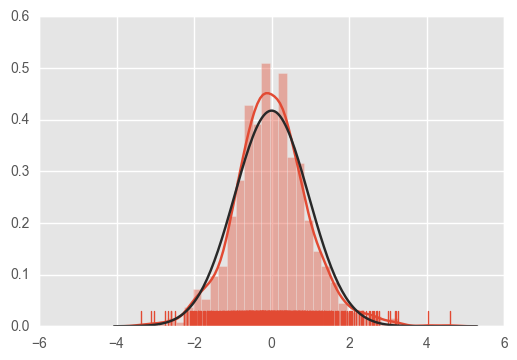

In [196]:
from scipy.stats import norm, normaltest, describe
sns.distplot(result2.resid, fit=norm, rug=True);
print describe(result2.resid)
stat, p = normaltest(result2.resid)
p

In [197]:
dummy_ranks = pd.get_dummies(player_stats3['Duration'], prefix='career')
print dummy_ranks.head()

                        career_3  career_4  career_5  career_6  career_7  \
Player_identifier                                                          
A.C. Green\greenac01           0         0         0         0         0   
A.J. Price\priceaj01           0         1         0         0         0   
Aaron Brooks\brookaa01         0         0         0         0         1   
Aaron Gray\grayaa01            0         0         1         0         0   
Aaron McKie\mckieaa01          0         0         0         0         0   

                        career_8  career_9  career_10  career_11  career_12  \
Player_identifier                                                             
A.C. Green\greenac01           0         0          0          0          0   
A.J. Price\priceaj01           0         0          0          0          0   
Aaron Brooks\brookaa01         0         0          0          0          0   
Aaron Gray\grayaa01            0         0          0          0        

In [198]:
#Adding in dummy ranks on how long a players career was 
data = player_stats3.join(dummy_ranks.ix[:, 'career_4':])
print data.head()

                                G           MP       FG%       3P%       2P%  \
Player_identifier                                                              
A.C. Green\greenac01    75.235294  2206.000000  0.484647  0.145647  0.499353   
A.J. Price\priceaj01    32.285714   477.714286  0.367571  0.263000  0.443000   
Aaron Brooks\brookaa01  57.500000  1359.200000  0.401100  0.357500  0.428000   
Aaron Gray\grayaa01     42.000000   468.333333  0.453000  0.000000  0.459000   
Aaron McKie\mckieaa01   60.133333  1442.400000  0.407267  0.295667  0.434133   

                            eFG%       FT%         TRB         AST        STL  \
Player_identifier                                                               
A.C. Green\greenac01    0.490412  0.713765  573.411765   83.235294  62.000000   
A.J. Price\priceaj01    0.428714  0.608286   45.428571   71.571429  13.857143   
Aaron Brooks\brookaa01  0.473400  0.853700  107.500000  204.500000  37.100000   
Aaron Gray\grayaa01     0.453000  

In [206]:
#data['ID'] = data.index

In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1118 entries, A.C. Green\greenac01 to Zydrunas Ilgauskas\ilgauzy01
Data columns (total 34 columns):
G            1118 non-null float64
MP           1118 non-null float64
FG%          1118 non-null float64
3P%          1118 non-null float64
2P%          1118 non-null float64
eFG%         1118 non-null float64
FT%          1118 non-null float64
TRB          1118 non-null float64
AST          1118 non-null float64
STL          1118 non-null float64
BLK          1118 non-null float64
PTS          1118 non-null float64
WS           1118 non-null float64
amin         1118 non-null int64
amax         1118 non-null int64
Duration     1118 non-null int64
career_4     1118 non-null uint8
career_5     1118 non-null uint8
career_6     1118 non-null uint8
career_7     1118 non-null uint8
career_8     1118 non-null uint8
career_9     1118 non-null uint8
career_10    1118 non-null uint8
career_11    1118 non-null uint8
career_12    1118 non-null uint8
care

In [204]:
#We need to set the intercept so that it does not go through the point (0,0)
data['intercept'] = 1.0

In [229]:
#Here is where the data is fit to ensure that we are able to run our model
#There is a fear of overfitting the model but we will check the resuts of fitting our model in the next step
#train_cols = data.WS
#logit = sm.Logit(data['WS'], data[train_cols])

# fit the model
#result = logit.fit()

In [230]:
from sklearn.ensemble import RandomForestClassifier

#X = player_stats3[['Duration', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'PTS', 'WS']].dropna()
#y = X['WS']
#X.drop('WS', axis=1, inplace=True)

#model = RandomForestClassifier(n_estimators = 20)
#use random forest instead of decision tree 
#model.fit(X, y)
#model.predict(x_)--This will allow you to predict new data 

In [231]:
#features = X.columns
#feature_importances = model.feature_importances_

#features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
#features_df.sort_values('Importance Score', inplace=True, ascending=False)

#features_df.head()

In [225]:
dummy_ranks2 = pd.get_dummies(wstats['Age'], prefix='age')
print dummy_ranks2.head()

   age_19  age_20  age_21  age_22  age_23  age_24  age_25  age_26  age_27  \
0       0       0       0       0       0       0       1       0       0   
1       0       0       1       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       1   
6       0       0       0       0       0       0       0       0       0   

   age_28   ...    age_33  age_34  age_35  age_36  age_37  age_38  age_39  \
0       0   ...         0       0       0       0       0       0       0   
1       0   ...         0       0       0       0       0       0       0   
3       0   ...         0       0       0       0       0       0       0   
4       0   ...         0       0       0       0       0       0       0   
6       0   ...         0       0       0       0       0       0       0   

   age_40  age_41  age_42  
0       0       0       0  
1       0       0 

In [264]:
#the mean for WS overall is 2.7 so if a player has above 2.7 WS than they are in the top 50% of the league
wstats['ws_average'] = np.where(wstats['WS']>=2.7, '1', '0') 
print wstats.head()

   Season            Player_identifier Pos  Age   Tm   G    MP    FG%    3P%  \
0    2015           Quincy Acy\acyqu01  PF   25  SAC  59   876  0.556  0.388   
1    2015       Jordan Adams\adamsjo01  SG   21  MEM   2    15  0.333  0.000   
3    2015      Arron Afflalo\afflaar01  SG   30  NYK  71  2371  0.443  0.382   
4    2015      Alexis Ajinca\ajincal01   C   27  NOP  59   861  0.476  0.000   
6    2015  LaMarcus Aldridge\aldrila01  PF   30  SAS  74  2261  0.513  0.000   

     2P%     ...        FT%  TRB  AST  STL  BLK   PTS             Player  \
0  0.606     ...      0.735  188   27   29   24   307         Quincy Acy   
1  0.400     ...      0.600    2    3    3    0     7       Jordan Adams   
3  0.469     ...      0.840  266  144   25   10   909      Arron Afflalo   
4  0.478     ...      0.839  269   31   19   36   352      Alexis Ajinca   
6  0.521     ...      0.858  632  110   38   81  1331  LaMarcus Aldridge   

   Player_id   WS  ws_average  
0    acyqu01  1.7           0 

In [265]:
cols_to_keep = ['Season','Age', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'PTS', 'WS', 'ws_average']
data2 = wstats[cols_to_keep].join(dummy_ranks2.ix[:, 'age_20':])
print data2.head()

   Season  Age   eFG%  TRB  AST  STL  BLK   PTS   WS ws_average   ...    \
0    2015   25  0.600  188   27   29   24   307  1.7          0   ...     
1    2015   21  0.333    2    3    3    0     7  0.4          0   ...     
3    2015   30  0.500  266  144   25   10   909  2.6          0   ...     
4    2015   27  0.476  269   31   19   36   352  3.2          1   ...     
6    2015   30  0.513  632  110   38   81  1331  8.6          1   ...     

   age_33  age_34  age_35  age_36  age_37  age_38  age_39  age_40  age_41  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   

   age_42  
0       0  
1       0  
3       0  
4       0  
6       0  

[5 rows x 33 

In [266]:
data2=data2.dropna()

In [267]:
#We need to set the intercept so that it does not go through the point (0,0)
data2['intercept'] = 1.0

In [268]:
train_cols = data2.columns[1:]

logit = sm.Logit(data2['ws_average'], data2[train_cols])

# fit the model
result = logit.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).